In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [ ]:
fig, ax = plt.subplots()
fig.canvas.width = '7in'
fig.canvas.height= '5in'

# if I hide the header here, I get a libpng error
# fig.canvas.header_visible = False

ax.plot([1,2,3], [4,5,3])

In [ ]:
# hiding after rendering works
fig.canvas.header_visible = False

In [ ]:
# hiding together with calls to toolbar options, work.
fig, ax = plt.subplots()
fig.canvas.width = '7in'
fig.canvas.height= '5in'

fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False

ax.plot([1,2,3], [4,5,3])

In [ ]:
# When using the `widget` backend from ipympl,
# fig.canvas is a proper Jupyter interactive widget, which can be embedded in
# an ipywidgets layout. See https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html

# One can bound figure attributes to other widget values.
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Shadow

# make a square figure and axes
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

explode = (0, 0.05, 0, 0)

# We want to draw the shadow for each pie but we will not use "shadow"
# option as it does'n save the references to the shadow patches.
pies = ax.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%')

for w in pies[0]:
    # set the id with the label.
    w.set_gid(w.get_label())

    # we don't want to draw the edge of the pie
    w.set_edgecolor("none")

for w in pies[0]:
    # create shadow patch
    s = Shadow(w, -0.01, -0.01)
    s.set_gid(w.get_gid() + "_shadow")
    s.set_zorder(w.get_zorder() - 0.1)
    ax.add_patch(s)


# save
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")

import xml.etree.cElementTree as ET


# filter definition for shadow using a gaussian blur
# and lightening effect.
# The lightening filter is copied from http://www.w3.org/TR/SVG/filters.html

# I tested it with Inkscape and Firefox3. "Gaussian blur" is supported
# in both, but the lightening effect only in the Inkscape. Also note
# that, Inkscape's exporting also may not support it.

filter_def = """
  <defs xmlns='http://www.w3.org/2000/svg' xmlns:xlink='http://www.w3.org/1999/xlink'>
    <filter id='dropshadow' height='1.2' width='1.2'>
      <feGaussianBlur result='blur' stdDeviation='2'/>
    </filter>

    <filter id='MyFilter' filterUnits='objectBoundingBox' x='0' y='0' width='1' height='1'>
      <feGaussianBlur in='SourceAlpha' stdDeviation='4%' result='blur'/>
      <feOffset in='blur' dx='4%' dy='4%' result='offsetBlur'/>
      <feSpecularLighting in='blur' surfaceScale='5' specularConstant='.75'
           specularExponent='20' lighting-color='#bbbbbb' result='specOut'>
        <fePointLight x='-5000%' y='-10000%' z='20000%'/>
      </feSpecularLighting>
      <feComposite in='specOut' in2='SourceAlpha' operator='in' result='specOut'/>
      <feComposite in='SourceGraphic' in2='specOut' operator='arithmetic'
    k1='0' k2='1' k3='1' k4='0'/>
    </filter>
  </defs>
"""


tree, xmlid = ET.XMLID(f.getvalue())

# insert the filter definition in the svg dom tree.
tree.insert(0, ET.XML(filter_def))

for i, pie_name in enumerate(labels):
    pie = xmlid[pie_name]
    pie.set("filter", 'url(#MyFilter)')

    shadow = xmlid[pie_name + "_shadow"]
    shadow.set("filter", 'url(#dropshadow)')

fn = "svg_filter_pie.svg"
print("Saving '%s'" % fn)
ET.ElementTree(tree).write(fn)

In [ ]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')


In [ ]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
for i in range(10):
    pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

In [ ]:
!pip install drawsvg

In [ ]:
import drawSvg as draw

In [ ]:
from IPython.display import SVG, display

In [ ]:
d = draw.Drawing(200, 200, origin='center')

In [ ]:
c = draw.Circle(0, 0, 20, fill='red')

In [ ]:
d.append(c)

In [ ]:
d

In [ ]:
c0 = d.allElements()[0]

In [ ]:
c0.args

In [ ]:
c0.args={'cx': 0, 'cy': 0, 'r': 25, 'fill': 'red'}

In [ ]:
r = draw.Rectangle(5,5,5,3,fill='blue')

In [ ]:
d.append(r)

In [ ]:
r.args

In [ ]:
r.args={'x': 25, 'y': 25, 'width': 25, 'height': 20, 'fill': 'blue'}

In [ ]:
!pip3 install hyperbolic

In [ ]:
import drawSvg as draw
from drawSvg.widgets import DrawingWidget
import hyperbolic.poincare.shapes as hyper  # pip3 install hyperbolic

# Create drawing
d = draw.Drawing(2, 2, origin='center')
d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange'))
group = draw.Group()
d.append(group)

# Update the drawing based on user input
click_list = []
def redraw(points):
    group.children.clear()
    for x1, y1 in points:
        for x2, y2 in points:
            if (x1, y1) == (x2, y2): continue
            p1 = hyper.Point.fromEuclid(x1, y1)
            p2 = hyper.Point.fromEuclid(x2, y2)
            if p1.distanceTo(p2) <= 2:
                line = hyper.Line.fromPoints(*p1, *p2, segment=True)
                group.draw(line, hwidth=0.2, fill='white')
    for x, y in points:
        p = hyper.Point.fromEuclid(x, y)
        group.draw(hyper.Circle.fromCenterRadius(p, 0.1),
                   fill='green')
redraw(click_list)

# Create interactive widget and register mouse events
widget = DrawingWidget(d)
@widget.mousedown
def mousedown(widget, x, y, info):
    if (x**2 + y**2) ** 0.5 + 1e-5 < 1:
        click_list.append((x, y))
    redraw(click_list)
    widget.refresh()
@widget.mousemove
def mousemove(widget, x, y, info):
    if (x**2 + y**2) ** 0.5 + 1e-5 < 1:
        redraw(click_list + [(x, y)])
    widget.refresh()
widget

![](fourbar.png)

In [ ]:
!pip install sympy

In [ ]:
!pip install pydy

In [1]:
from __future__ import print_function, division
from sympy.physics.mechanics import *
from sympy.physics.vector import time_derivative
from sympy import symbols
from numpy import array, linspace, rad2deg, deg2rad
from scipy.integrate import odeint
from pydy.codegen.ode_function_generators import generate_ode_function
# number of links in the mechanism
n = 3
# generalized speeds and coordinates
theta = dynamicsymbols('theta:{}'.format(n))
theta_d = dynamicsymbols('theta:{}'.format(n), 1)
omega = dynamicsymbols('omega:{}'.format(n))
omega_d = dynamicsymbols('omega:{}'.format(n), 1)
# the extra symbol thanks to n+1 stands for the distance
# between the grounding joints
length_bars = symbols('L_B:{}'.format(n+1))
g = symbols('g') # gravity

In [2]:
# reference frames
inertial_frame = ReferenceFrame('I')
bar0_frame = inertial_frame.orientnew('B0', 'Axis', (theta[0],
 inertial_frame.z))
bar1_frame = inertial_frame.orientnew('B1', 'Axis', (theta[1],
 inertial_frame.z))
bar2_frame = inertial_frame.orientnew('B2', 'Body', [0, 0, theta[2]],
 'XYZ')
# angular velocities
bar0_frame.set_ang_vel(inertial_frame, omega[0]*inertial_frame.z)
bar1_frame.set_ang_vel(inertial_frame, omega[1]*inertial_frame.z)
bar2_frame.set_ang_vel(inertial_frame, omega[2]*inertial_frame.z)

In [3]:
# joints
joint0 = Point('j0')
joint1 = joint0.locatenew('j1', length_bars[0] * bar0_frame.x)
joint2 = joint1.locatenew('j2', length_bars[1] * bar1_frame.x)
joint3 = joint2.locatenew('j3', -length_bars[2] * bar2_frame.x)
# cm positions
bar0_cm = joint0.locatenew('b0cm', length_bars[0]/2 * bar0_frame.x)
bar1_cm = joint1.locatenew('b1cm', length_bars[1]/2 * bar1_frame.x)
bar2_cm = joint3.locatenew('b2cm', length_bars[2]/2 * bar2_frame.x)

In [4]:
# velocity of the grounding joints is 0
joint0.set_vel(inertial_frame, 0)
joint3.set_vel(inertial_frame, 0)
# velocity if the remaining joints
joint1.v2pt_theory(joint0, inertial_frame, bar0_frame)
joint2.v2pt_theory(joint1, inertial_frame, bar1_frame)
# velocity if centres of mass
bar0_cm.v2pt_theory(joint0, inertial_frame, bar0_frame)
bar1_cm.v2pt_theory(joint1, inertial_frame, bar1_frame)
bar2_cm.v2pt_theory(joint2, inertial_frame, bar2_frame) 

L_B0*omega0*B0.y + L_B1*omega1*B1.y - L_B2*omega2/2*B2.y

In [5]:
# configuration constraint
zero = joint3.pos_from(joint0) + length_bars[3] * inertial_frame.x
f_c = [zero & inertial_frame.x, zero & inertial_frame.y]
# velocity constraint
dzero = time_derivative(zero, inertial_frame)
f_v = [dzero & inertial_frame.x, dzero & inertial_frame.y] 

In [6]:
# mass and inertia
mass_bars = symbols('m_B:{}'.format(n))
inertia_bars = symbols('I_B:{}'.format(n))
# inertia(frame, ixx=0, iyy=0, izz, ixy=0, iyz=0, izx=0)
bar0_indyad = inertia(bar0_frame, 0, 0, inertia_bars[0])
bar1_indyad = inertia(bar1_frame, 0, 0, inertia_bars[1])
bar2_indyad = inertia(bar2_frame, 0, 0, inertia_bars[2])
bar0_inertia = (bar0_indyad, bar0_cm)
bar1_inertia = (bar1_indyad, bar1_cm)
bar2_inertia = (bar2_indyad, bar2_cm)
# bodies
bar0 = RigidBody('Bar 0', bar0_cm, bar0_frame, mass_bars[0],
 bar0_inertia)
bar1 = RigidBody('Bar 1', bar1_cm, bar0_frame, mass_bars[1],
 bar1_inertia)
bar2 = RigidBody('Bar 1', bar2_cm, bar0_frame, mass_bars[2],
 bar2_inertia)
bodies = [bar0, bar1, bar2] 

In [7]:
# forces
bar0_force = (bar0_cm, -mass_bars[0] * g * inertial_frame.y)
bar1_force = (bar1_cm, -mass_bars[1] * g * inertial_frame.y)
bar2_force = (bar2_cm, -mass_bars[2] * g * inertial_frame.y)
loads = [bar0_force, bar1_force, bar2_force] 

In [8]:
# kinematic differential equations
KDE = [theta_d[0] - omega[0], theta_d[1] - omega[1],
 theta_d[2] - omega[2]]
# Kanes Method
kane = KanesMethod(inertial_frame, q_ind=[theta[0]],
 u_ind=[omega[0]],
 q_dependent=[theta[1],theta[2]],
 u_dependent=[omega[1],omega[2]],
 configuration_constraints=f_c,
 velocity_constraints=f_v,
 kd_eqs=KDE)
fr, frstar = kane.kanes_equations(bodies, loads) 

In [15]:
# list of constants
constants = [g,
mass_bars[0],
mass_bars[1],
mass_bars[2],
length_bars[0],
length_bars[1],
length_bars[2],
length_bars[3],
inertia_bars[0],
inertia_bars[1],
inertia_bars[2]]
kdd = kane.kindiffdict()
mass_matrix = kane.mass_matrix_full.subs(kdd)
forcing_vector = kane.forcing_full.subs(kdd)
right_hand_side = generate_ode_function(forcing_vector,
theta, omega, constants, mass_matrix=mass_matrix)
# list of numerical values
numerical_constants = [9.81,
2.0,
5.0,
4.0,
2.0,
5.0,
5.0,
4.0,
1.0,
1.0,
1.0]
# inital conditions
x0 = array([deg2rad(135), deg2rad(41.3340), deg2rad(109.3884), 0.0,
0.0, 0.0])
# timeframe
frames_per_sec = 100
final_time = 20.0
t = linspace(0.0, final_time, int(final_time * frames_per_sec))
# integration
y = odeint(right_hand_side, x0, t,
args=(dict(zip(constants, numerical_constants)),))

In [20]:
from matplotlib import pyplot as plt

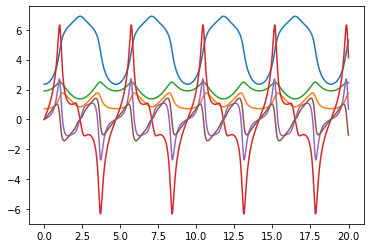

In [21]:
plt.plot(t,y)

In [1]:
car = """\
!!omap
- name: car
- parts:
  - name: head
    shapes:
      libraries: ['from math import tan, radians, sin, cos', 'from pysketcher import *']
  - name: constants
    shapes:
        R: 1.0    # radius of wheel
        L: 4.0    # distance between wheels
        H: 2.0    # height of vehicle body
        w_1: 5.0  # position of front wheel
  - name: frame
    shapes:
        xmax: w_1 + 2*L + 3*R
        setframe:
            action: drawing_tool.set_coordinate_system(xmin=0, xmax=xmax,
                                   ymin=-1, ymax=2*R + 3*H,
                                   axis=False)
        wheel1: |
                 Composition({'wheel': Circle(center=(w_1, R), radius=R),
                    'cross': Composition({'cross1': Line((w_1,0),(w_1,2*R)),
                    'cross2': Line((w_1-R,R), (w_1+R,R))})})
        wheel2: 
            formula: wheel1.copy()
            transform: translate((L,0))

        under: Rectangle(lower_left_corner=(w_1-2*R, 2*R),
                  width=2*R + L + 2*R, height=H)
        over: Rectangle(lower_left_corner=(w_1, 2*R + H),
                  width=2.5*R, height=1.25*H)

        wheels: | 
                  Composition({'wheel1': wheel1, 'wheel2': wheel2})
        body:  |
                 Composition({'under': under, 'over': over})

        vehicle: |
                  Composition({'wheels': wheels, 'body': body})
        ground: Wall(x=[R, xmax], y=[0, 0], thickness=-0.3*R)

        car: |
               Composition({'vehicle': vehicle, 'ground': ground})
"""

In [2]:
from ruamel.yaml import YAML

In [3]:
from pysketcher import *

In [4]:
yaml = YAML()

In [5]:
ycar = yaml.load(car)

In [6]:
type(ycar['parts'][2]['shapes']['wheel1'])

ruamel.yaml.scalarstring.LiteralScalarString

In [18]:
"".join([s.strip() for s in ycar['parts'][2]['shapes']['wheel1'].split("\n")])

"Composition({'wheel': Circle(center=(w_1, R), radius=R),'cross': Composition({'cross1': Line((w_1,0),(w_1,2*R)),'cross2': Line((w_1-R,R), (w_1+R,R))})})"

In [14]:
wheel1 = exec(f"wheel1 = {ycar['parts'][2]['shapes']['wheel1']}")

NameError: name 'w_1' is not defined

In [4]:
from pysketcher import *

In [8]:
from IPython.display import HTML, SVG, display, clear_output

In [6]:
"""Draw mechanical vibration system."""
L = 12.
H = L/6
W = L/6

xmax = L
drawing_tool.set_coordinate_system(xmin=-L, xmax=xmax,
                                   ymin=-1, ymax=L+H,
                                   axis=False,
                                   instruction_file='tmp_mpl.py')
x = 0
drawing_tool.set_linecolor('black')

def make_dashpot(x):
    d_start = (-L,2*H)
    d = Dashpot(start=d_start, total_length=L+x, width=W,
                bar_length=3*H/2, dashpot_length=L/2, piston_pos=H+x)
    d.rotate(-90, d_start)
    return d

def make_spring(x):
    s_start = (-L,4*H)
    s = Spring(start=s_start, length=L+x, bar_length=3*H/2, teeth=True)
    s.rotate(-90, s_start)
    return s

d = make_dashpot(0)
s = make_spring(0)

M = Rectangle((0,H), 4*H, 4*H).set_linewidth(4)
left_wall = Rectangle((-L,0),H/10,L).set_filled_curves(pattern='/')
ground = Wall(x=[-L/2,L], y=[0,0], thickness=-H/10)
wheel1 = Circle((H,H/2), H/2)
wheel2 = wheel1.copy()
wheel2.translate(point(2*H, 0))

fontsize = 18
text_m = Text('$m$', (2*H, H+2*H), fontsize=fontsize)
text_ku = Text('$ku$', (-L/2, H+4*H), fontsize=fontsize)
text_bv = Text("$bu'$", (-L/2, H), fontsize=fontsize)
x_axis = Axis((2*H, L), H, '$u(t)$', fontsize=fontsize,
              label_spacing=(0.04, -0.01))
x_axis_start = Line((2*H, L-H/4), (2*H, L+H/4)).set_linewidth(4)

fig = Composition({
    'spring': s, 'mass': M, 'left wall': left_wall,
    'ground': ground, 'wheel1': wheel1, 'wheel2': wheel2,
    'text_m': text_m, 'text_ku': text_ku,
    'x_axis': x_axis, 'x_axis_start': x_axis_start})

fig.draw()


# or fig = Composition(dict(fig=fig, dashpot=d, text_bv=text_bv))

{
'spring': {
    'bar1': {
        'line': "2 (x,y) coords",},
    'spiral': "45 (x,y) coords",
    'bar2': {
        'line': "2 (x,y) coords",},},
'mass': {
    'rectangle': "5 (x,y) coords linewidth=4",},
'left wall': {
    'rectangle': "5 (x,y) coords fillcolor='' fillpattern='/'",},
'ground': {
    'wall': "4 (x,y) coords fillcolor='white' fillpattern='/'",},
'wheel1': {
    'arc': "181 (x,y) coords",},
'wheel2': {
    'arc': "181 (x,y) coords",},
'text_m': "Text at (4,6)",
'text_ku': "Text at (-6,10)",
'x_axis': {
    'arrow': {
        'line': {
            'line': "2 (x,y) coords",},
        'head left': {
            'line': "2 (x,y) coords linestyle='solid'",},
        'head right': {
            'line': "2 (x,y) coords linestyle='solid'",},},
    'label': "Text at (6.96,11.85)",},
'x_axis_start': {
    'line': "2 (x,y) coords linewidth=4",},}

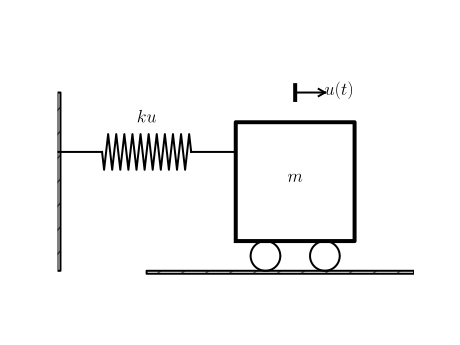

In [9]:
display(SVG(Sketch.matplotlib2SVG()))